What is the most demanded skills for the top 3 most popular data roles in the US  ?

In [1]:
#importing libraries
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast

# loding data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mveun\anaconda3\envs\DATA_PROJECT\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_saudi = df[df['job_country'] == 'Saudi Arabia']

In [3]:
df_saudi

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
229,Data Engineer,Data Engineer,Saudi Arabia,via Qureos,Full-time,False,Saudi Arabia,2023-11-07 13:34:28,True,False,Saudi Arabia,None,NaN,NaN,AECOM,None,None
1047,Business Analyst,Analyst,Riyadh Saudi Arabia,via Trabajo.org,Full-time,False,Saudi Arabia,2023-07-24 13:13:13,False,False,Saudi Arabia,None,NaN,NaN,Strategic Gears Management Consultancy,None,None
1394,Senior Data Scientist,Senior Analyst,Riyadh Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-12-05 13:12:55,True,False,Saudi Arabia,None,NaN,NaN,HRcom,None,None
1633,Data Engineer,Engine Tracking Data Base Systems Engineer,Khamis Mushait Saudi Arabia,via Leidos Careers,Full-time,False,Saudi Arabia,2023-05-30 13:11:51,False,False,Saudi Arabia,None,NaN,NaN,Leidos,"[sql, oracle]","{'cloud': ['oracle'], 'programming': ['sql']}"
2009,Senior Data Analyst,Senior Data Analyst,Riyadh Saudi Arabia,via LinkedIn,Full-time,False,Saudi Arabia,2023-01-26 13:37:02,True,False,Saudi Arabia,None,NaN,NaN,JLL,"[spark, tableau, alteryx]","{'analyst_tools': ['tableau', 'alteryx'], 'lib..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783537,Software Engineer,L1 SOC Analyst,Riyadh Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-01-01 06:36:55,True,False,Saudi Arabia,None,NaN,NaN,Jafeer Technologies,None,None
783660,Business Analyst,Media Analyst,Riyadh Saudi Arabia,via LinkedIn,Full-time,False,Saudi Arabia,2023-07-20 06:13:08,True,False,Saudi Arabia,None,NaN,NaN,MEDPUSH MENA,[excel],{'analyst_tools': ['excel']}
783751,Business Analyst,THAAD Field Engineer,Saudi Arabia,via BeBee,Full-time,False,Saudi Arabia,2023-12-04 06:06:34,False,False,Saudi Arabia,None,NaN,NaN,"Akima Intra Data, LLC","[unix, linux, windows, terminal]","{'os': ['unix', 'linux', 'windows'], 'other': ..."
784144,Data Analyst,DATA GOVERNANCE MANAGER,Saudi Arabia,via Saudi.tanqeeb.com,Full-time,False,Saudi Arabia,2023-09-19 23:00:00,False,False,Saudi Arabia,None,NaN,NaN,Cognizant,[outlook],{'analyst_tools': ['outlook']}


In [4]:
df_saudi = df_saudi.dropna(subset= ['job_skills'] )

In [5]:
saudi_skills = df_saudi.explode('job_skills')

saudi_skills[['job_title_short' , 'job_skills']]

,job_title_short,job_skills
1633,Data Engineer,sql
1633,Data Engineer,oracle
2009,Senior Data Analyst,spark
2009,Senior Data Analyst,tableau
2009,Senior Data Analyst,alteryx
...,...,...
783751,Business Analyst,unix
783751,Business Analyst,linux
783751,Business Analyst,windows
783751,Business Analyst,terminal


In [6]:
saudi_skills_count = saudi_skills.groupby(['job_skills' , 'job_title_short']).size()

In [7]:
saudi_skills_count

job_skills  job_title_short          
airflow     Data Analyst                  7
            Data Engineer                40
            Data Scientist                4
            Machine Learning Engineer     8
            Senior Data Engineer         15
                                         ..
zoom        Business Analyst              1
            Data Analyst                  3
            Data Engineer                 2
            Machine Learning Engineer     2
            Software Engineer             2
Length: 826, dtype: int64

In [8]:
saudi_skills_count = saudi_skills_count.reset_index(name='skill_count')


In [9]:
saudi_skills_count.sort_values(by='skill_count' , ascending= False , inplace=True)

In [10]:
saudi_skills_count

,job_skills,job_title_short,skill_count
685,sql,Data Analyst,297
518,python,Data Scientist,295
163,excel,Data Analyst,241
686,sql,Data Engineer,229
687,sql,Data Scientist,199
...,...,...,...
17,angular.js,Software Engineer,1
19,ansible,Data Engineer,1
20,ansible,Senior Data Engineer,1
23,asp.net,Software Engineer,1


In [11]:
job_titles = saudi_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[0:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

plot skills count

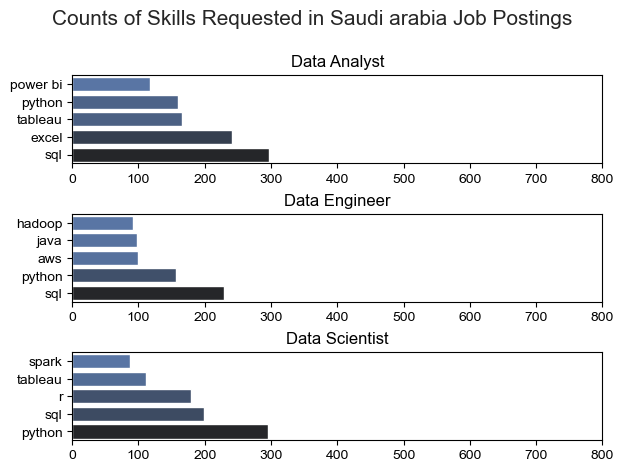

In [12]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = saudi_skills_count[saudi_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis() 
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 800) # make the scales the same

fig.suptitle('Counts of Skills Requested in Saudi arabia Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

Convert Counts to Percentages


In [13]:
jobs_count = df_saudi['job_title_short'].value_counts().reset_index(name= 'jobs_total')

In [14]:
jobs_count

,job_title_short,jobs_total
0,Data Analyst,515
1,Data Scientist,451
2,Data Engineer,337
3,Business Analyst,219
4,Software Engineer,176
5,Senior Data Scientist,94
6,Senior Data Engineer,88
7,Senior Data Analyst,52
8,Cloud Engineer,43
9,Machine Learning Engineer,36


In [15]:
saudi_skills_count

,job_skills,job_title_short,skill_count
685,sql,Data Analyst,297
518,python,Data Scientist,295
163,excel,Data Analyst,241
686,sql,Data Engineer,229
687,sql,Data Scientist,199
...,...,...,...
17,angular.js,Software Engineer,1
19,ansible,Data Engineer,1
20,ansible,Senior Data Engineer,1
23,asp.net,Software Engineer,1


In [16]:
df_skills_perc =pd.merge(saudi_skills_count , jobs_count , how='left' , on='job_title_short')

In [17]:
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,sql,Data Analyst,297,515
1,python,Data Scientist,295,451
2,excel,Data Analyst,241,515
3,sql,Data Engineer,229,337
4,sql,Data Scientist,199,451
...,...,...,...,...
821,angular.js,Software Engineer,1,176
822,ansible,Data Engineer,1,337
823,ansible,Senior Data Engineer,1,88
824,asp.net,Software Engineer,1,176


In [18]:
df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] *100 

df_skills_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Analyst,297,515,57.669903
1,python,Data Scientist,295,451,65.410200
2,excel,Data Analyst,241,515,46.796117
3,sql,Data Engineer,229,337,67.952522
4,sql,Data Scientist,199,451,44.124169
...,...,...,...,...,...
821,angular.js,Software Engineer,1,176,0.568182
822,ansible,Data Engineer,1,337,0.296736
823,ansible,Senior Data Engineer,1,88,1.136364
824,asp.net,Software Engineer,1,176,0.568182


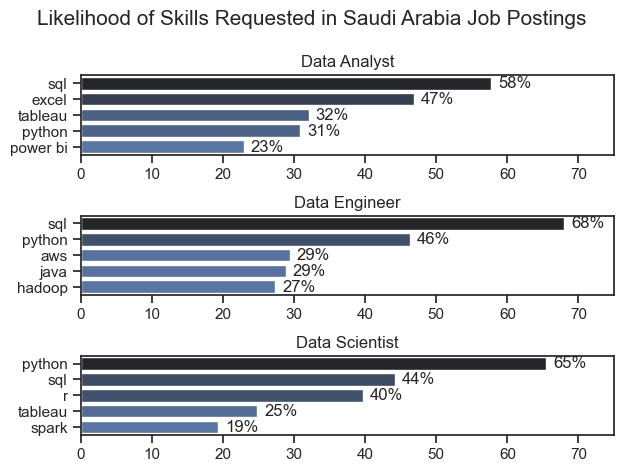

In [19]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 75)
    

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in Saudi Arabia Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()